### colab에서 konlpy사용

In [1]:
#colab konlpy 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [2]:
from konlpy.tag import Okt
from collections import Counter
import wordcloud

import numpy as np  
import pandas as pd

#이미지 불러와서 사용할 것
from PIL import Image  
import matplotlib.pyplot as plt 

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
text = pd.read_csv("곰표score.txt", sep='\t', header=None)
text

,0
0,쌀은 엄마가 보내주시거나 쿠팡에서 황금메뚜기쌀 주로 구입했었는데 마침 품절이라 가격...
1,안녕하세요\r\n약 한달전에 (5월13일) 구매했던 사람입니다\r\n평소에 퇴근하고...
2,이런 쌀 팔지마세요\r\n며칠전 받은쌀 지금 개봉했어요\r\n쌀봉투에 도정일이 5월...
3,최악이에요 쌀에서 썩은 김치가 나왔어요 음식물 쓰레기를 돈받고 파네요 쿠팡에서는 ㅋ...
4,... 이쌀은 정말 최악입니다\r\n\r\n쌀통에 부을때 곰팡내가 나고 쌀빛깔이 거...
...,...
4243,두가족 밥을 많이먹는편이고 3번째 재구매 입니다\r\n쌀알이 투명한게 표면도 깨끗하...
4244,저번에는 도정한지 거의 3주된걸 보내서 좀 그랬는데\r\n이번꺼는 도정일자가 4월 ...
4245,쌀알이 고르고 깨끗합니다.\r\n쌀을 씻을 때 보면 국물이 뽀얗게 우러납니다.\r\...
4246,요즈음 왠수사자가 일찍 가게마쳐서 집에서 밥을하게 되네요ㅠ 몇년동안 혼밥만하던 저로...


In [6]:
# 데이터 확인
text[0][0]

'쌀은 엄마가 보내주시거나 쿠팡에서 황금메뚜기쌀 주로 구입했었는데 마침 품절이라 가격도 싸고 평도 좋아서 구매했어요.....쌀이 오면 항상 생수통에 덜어놓고 먹는데 오자마자 뜯어서 통에 담는데 계속 까만쌀이나 이상하게 깨진 쌀이 많이 보여서 봤더니.....도정일은 11월26일로 되어있어서 1주일 정도 된거 같은데 쌀이 되게 묵은쌀 벌레먹은쌀 같아요...중간에 이상하게 곰팡이인지뭔지 초록색쌀도 있고 면이 되게 거칠어요 ㅠㅠ 제가 쌀에 대해 잘모르지만 이제껏 봐온 쌀중엔 진짜 보기 안좋은 쌀이 왔어요...밥은 아직 안해봐서 맛있을진 모르겠어요..ㅠㅠ'

In [7]:
# 판다스의 데이터 프레임으로 가져온 text를 str로 저장
q=" "
for i in range(4248):
    q+=text[0][i]

## Okt 형태소분석기 사용
from konlpy.tag import Okt

Okt()는 stem=True, norm=True의 파라미터로 단어들 1차적인 정규화, 오타 수정가능

- morphs(text ) :텍스트에서 형태소를 반환한다
- nouns(text ) :텍스트에서 명사를 반환한다
- phrases(text ) :텍스트에서 어절을 뽑아낸다
- pos(text ) :텍스트에서 품사 정보를 부착하여 반환한다

In [29]:
# 명사추출
okt = Okt()
nouns_list = okt.nouns(q)

In [42]:
# 제거할 단어 지정
stopwords= [ '구매','쿠팡','완전','전혀',
            '마침', '처럼', '수도', '얼마나', '물건', '그거', '이구', '감사', '이건', 
            '가나', '어도', '만해', '이후', '주문', '김치냉장고','하니','경우','별로',
            '중간', '걱정', '고민', '이번','편이', '매우', '일이', '그닥', '무엇', '거나', 
            '런가', '사진', '의사', '밥솥', '와우','쌀통','거의','거의','수령','오늘','언제', 
            '의사', '구입','혹시', '밥통','거기','압력밥솥', '사면', '계속', '그때','물질', 
            '절대', '혹시','가지','그동안','우선', '사실','도저히', '어디', '다행', '고해', 
            '먼저', '뭔가', '결론', '편입', '지은','보이', '워낙','건가' ,'다만','장난', 
            '전체','나름','짜증','순간', '실패','마음','지고', '갈수록', '끼리', '고요', 
            '듭니', '살이', '본적','리가', '번은','냉장고','라미', '어차피','어서', '쓰기',
            '사도','이면','또한','비지', '별루', '갑자기','지도','모든', '안해','만큼','하나',
            '등등', '온건', '살짝', '중이', '고생', '아래','양호' '저번', '해당', '진심', 
            '기분', '정말', '겨우', '전기','정일', '느낌', '일도','물질', '저녁',  '아침',
            '이틀', '만족', '조금', '판매', '기대', '선택', '을해', '시간','이용', '몇번',
            '아시', '가장', '여름', '불리', '최고', '보통', '보구', '강추', '불리','그대로',
            '다른','이전','보기', '제발', '제일', '생각',  '그냥', '정도', '가요','한번','작년',
            '우리','신경','로만','벌써', '점점', '시작', '위해','다시','진짜','바로','두번째',
            '자마자','기준','어보', '대해', '당황', '보지', '지난', '그것','실망','예정','최근',
            '기도', '자도', '일단', '인지', '자꾸', '제대로', '가끔','일반','며칠','잘못', '평보',
            '이나', '신청', '대부분', '좀더', '사지','방법','다가','가나', '덕분', '이제', '해먹',
            '여기','사서','부어','거리','어찌','지금','여러', '굳이', '당장', '아주','과정','추천',
            '변동', '문제','저희','무난','최악','남아', '해도', '사려', '때문', '누가', '화가', '작성',
            '무슨','오히려','마지막', '추정', '세상', '사고', '무조건', '깜짝', '대충', '매번','발견',
            '동안','요즘', '별하나', '전이', '양도', '아무', '분명', '수준', '말씀', '달도', '상황', '도나',
            '이기', '된거', '대한', '여러분', '드네', '달이', '하자', '아예', '첨부', '부터', '마다', '차라리',
            '나머지', '한적', '아마', '잡고', '래야', '다해', '이해', '더욱', '지으니', '평균', '요새', '특유', 
            '기본', '난리', '완료', '나중','바닥', '의향', '절반', '건데', '사기', '종종', '하루','역시', 
            '다음', '어제', '개월','유지','먹음', '마리','주로','도움', '쿠쿠', '뚝딱', '차지',
            '섭취', '가까이', '결과', '그게', '일부러','이정','질도', '문해','확인', '내일', '수가','재주','약간',
            '대체로', '사람','자체', '이유', '알도', '음식','도움', '광복', '앞전', '마냥', '원래', '경험', '현재',
            '품평' , '프로', '체적','추가','생수','금방','결정','기억','자주', '얘기','면서', '이하', '보시',
            '이하', '쭈욱', '심지어', '그다지', '달리', '적극','더니','지나''안보', '대략', '도전', '가게','는걸',
            '겨울','도대체','잠시', '통제','포함', '신분', '참고', '이상', '여름철','주말','동기','부분','방금',
            '이상은', '대체','가량', '해결', '노래', '선물','오후','가위','마치', '입안', '만하','물이','댓글',
            '그날','인기','요전','강화','올해','실제','솔직','한참','전부','정물','어른','요청','여기저기',
            '열흘','고집', '시중','냄비','고객','뚜껑','필요','안나']

In [48]:
# 데이터 정제
for noun in nouns_list:
    if len(noun) == 1:
      nouns_list.remove(noun)
    if noun in stopwords:
      nouns_list.remove(noun)

## 빈도 파악
리스트의 값의 빈도를 구해 딕셔너리로 반환

from collections import Counter

In [49]:
# 명사별 빈도구해 딕셔너리로 저장
cnt = Counter(nouns_list)
print(cnt)

Counter({'가격': 1115, '밥맛': 862, '배송': 751, '도정': 674, '윤기': 626, '냄새': 589, '상품': 473, '처음': 451, '포장': 420, '보관': 416, '후기': 399, '제품': 383, '쌀알': 348, '상태': 320, '보고': 295, '벌레': 264, '품질': 261, '항상': 231, '쌀벌레': 223, '잡곡': 221, '찹쌀': 218, '마트': 215, '비닐': 201, '대비': 201, '햅쌀': 164, '가성': 156, '날짜': 156, '로켓': 156, '지퍼': 150, '곰팡이': 149, '찰기': 144, '리뷰': 139, '브랜드': 132, '현미': 130, '평이': 125, '쌀밥': 123, '먹기': 119, '등급': 115, '가족': 112, '밥알': 111, '비교': 110, '차이': 108, '한지': 107, '박스': 104, '백미': 104, '포대': 96, '정기': 95, '종이': 91, '아이': 91, '품종': 89, '크기': 86, '쌀눈': 86, '도착': 84, '평소': 82, '코로나': 81, '개봉': 80, '저번': 80, '혼합': 80, '일자': 78, '색깔': 77, '식구': 75, '예전': 75, '품절': 73, '얼마': 69, '엄마': 67, '사용': 67, '쌀값': 63, '자취': 62, '반품': 62, '지난번': 61, '기존': 60, '인터넷': 58, '압력솥': 57, '누렇': 56, '매일': 56, '직접': 55, '남편': 54, '수분': 54, '혼자': 52, '생산': 51, '크게': 51, '검색': 51, '배달': 50, '쌀맛': 50, '고시히카리': 50, '세번': 49, '냉동': 49, '신동진': 49, '좔좔': 48, '김치': 47, '냉장': 47, '킬로': 47, '지인': 46, '입맛'

##워드클라우드 생성

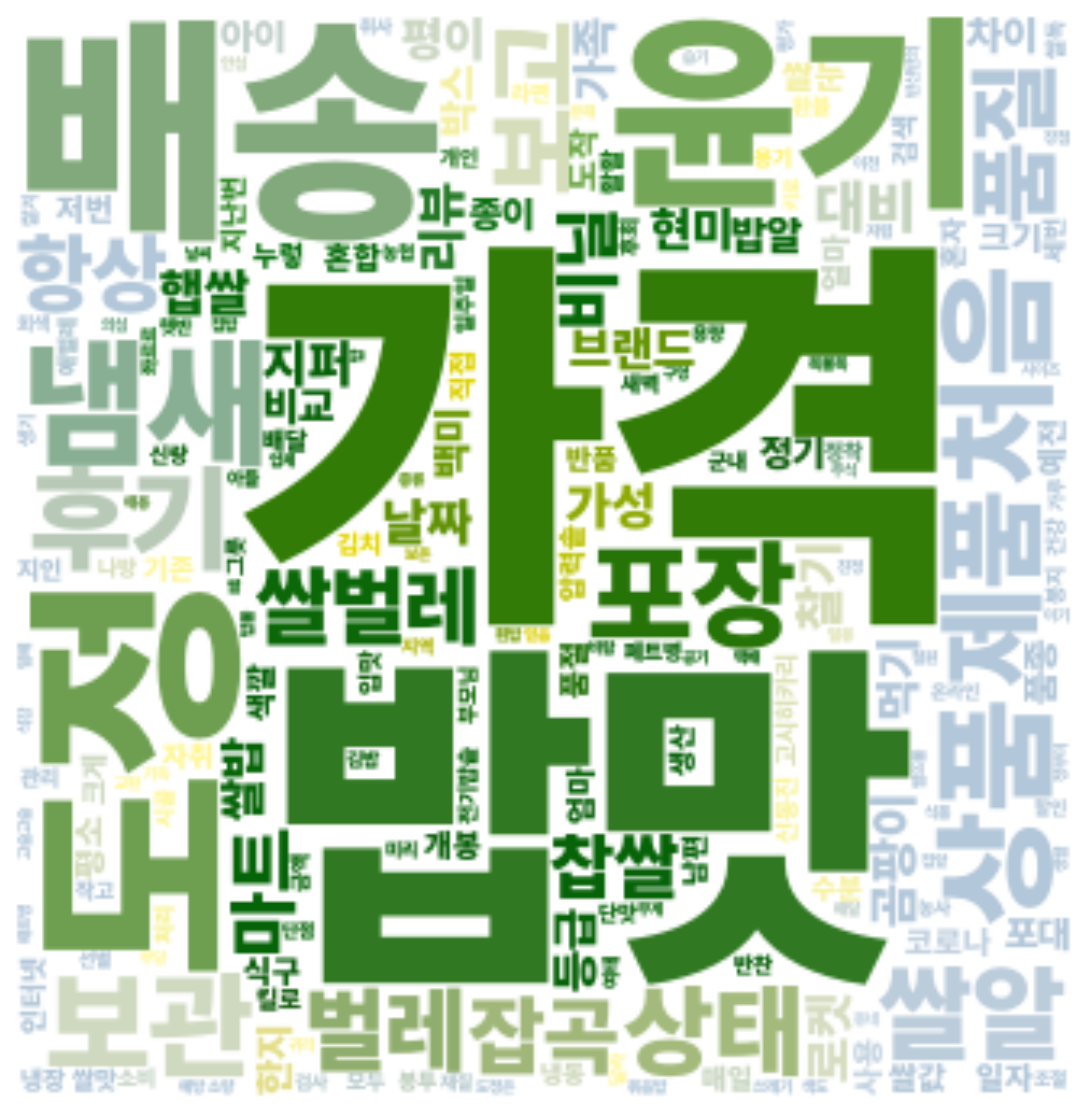

<Figure size 432x288 with 0 Axes>

In [52]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open("잘살아보세.png"))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("곰곰쌀_wordcloud.png") #이미지 파일로 저장

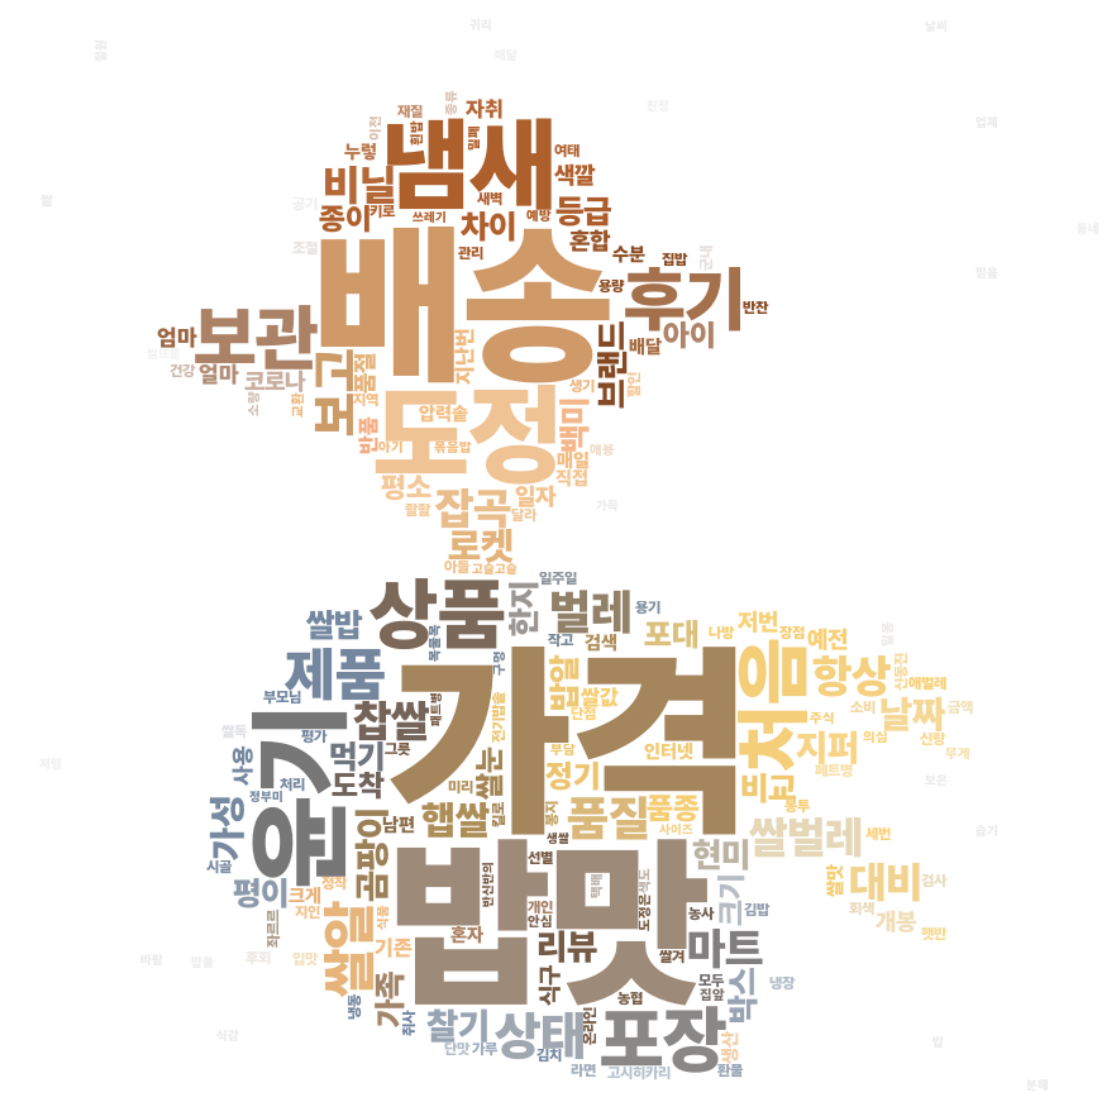

<Figure size 432x288 with 0 Axes>

In [58]:
# 특정이미지2 이용 워드클라우드 생성
img = np.array(Image.open("농부.png"))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("곰곰쌀농부_wordcloud.png") #이미지 파일로 저장

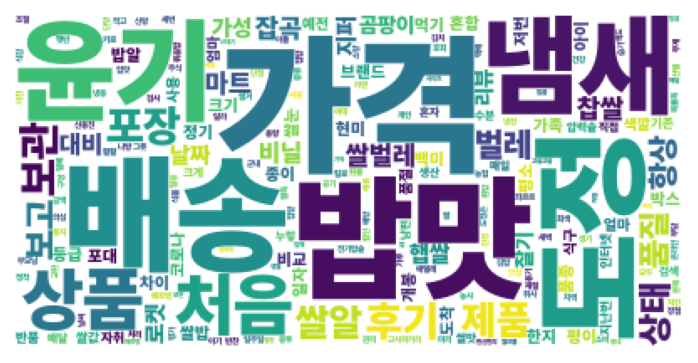

<Figure size 432x288 with 0 Axes>

In [54]:
# 이미지 이용없이 생성
cloud_image = wordcloud.WordCloud(
    font_path="Pretendard-Black.otf", background_color="white").generate_from_frequencies(cnt)

plt.imshow(cloud_image)
plt.axis("off")
plt.show()
plt.savefig("ricewordcloud.png")